January 2024

Day 89-90 Loan Predictions using Logistic Regression, Random Forest, XGBoost By Marcel Tiono

1. Importing Libraries

In [26]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

2. Load Datasets

In [62]:
df = pd.read_csv("Documents/train_u6lujuX_CVtuZ9i.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

3. Exploratory Data Analysis

In [6]:
df.Loan_ID.value_counts(dropna = False)

Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: count, Length: 614, dtype: int64

There is no duplicate value in the dataset

In [7]:
df.Gender.value_counts(dropna = False)

Gender
Male      489
Female    112
NaN        13
Name: count, dtype: int64

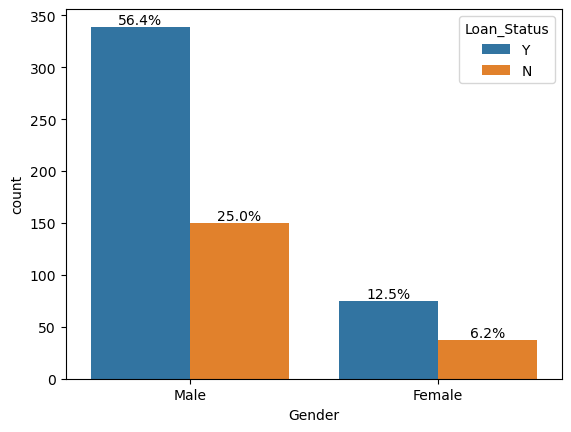

In [8]:
d = sns.countplot(x = "Gender", hue = "Loan_Status", data = df)
for c in d.containers:
    labels = [f'{h/df.Gender.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c] 
    d.bar_label(c, labels=labels, label_type='edge')
plt.show()

The plot shows that there are more males applicants compared to the females.Then, among males applicants 56.4% have loans and 25.0% do not.For females applicants, 12.5% have loans and 6.2% are loans free. 

In [9]:
df.Married.value_counts(dropna = False)

Married
Yes    398
No     213
NaN      3
Name: count, dtype: int64

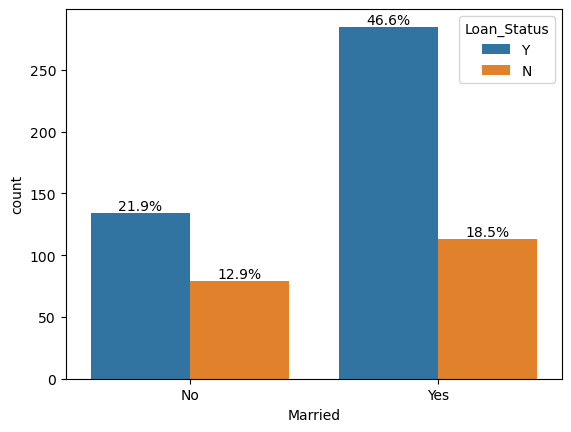

In [10]:
d = sns.countplot(x = "Married", hue = "Loan_Status", data = df)
for c in d.containers:
    labels = [f'{h/df.Married.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    d.bar_label(c, labels=labels, label_type='edge')
plt.show()

The number of applicants with married status is higher than those without married status. within applicants with married status,46.6% have contracted loans and those not married 21.9% have loans. 

In [11]:
df.Education.value_counts(dropna = False)

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

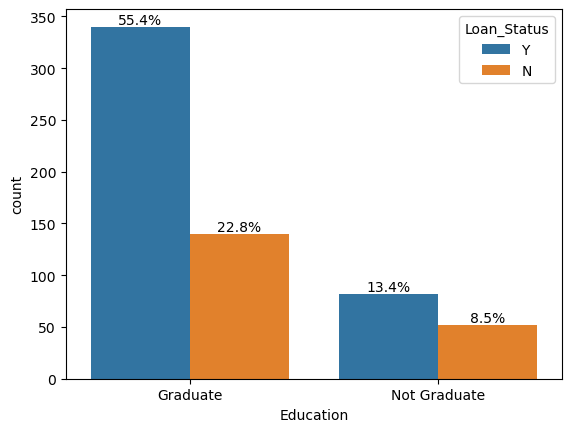

In [12]:
d =sns.countplot(x = "Education", hue = "Loan_Status", data = df)
for c in d.containers:
    labels = [f'{h/df.Education.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    d.bar_label(c, labels=labels, label_type='edge')
plt.show()

The plot display that there more graduate applicants compared to not graduate. Graduate applicants with loans is 55.4% and 13.4% for not graduate.

In [13]:
df.Self_Employed.value_counts(dropna = False)

Self_Employed
No     500
Yes     82
NaN     32
Name: count, dtype: int64

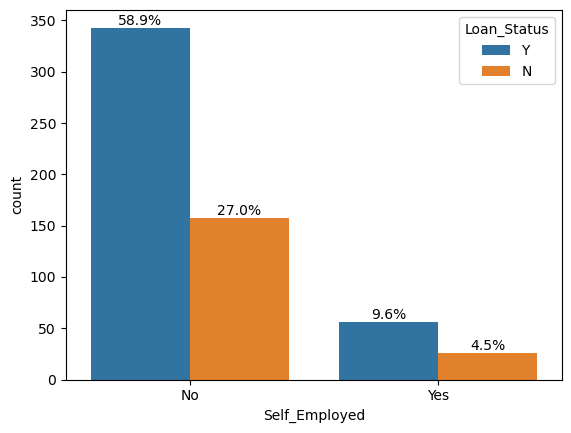

In [14]:
d =sns.countplot(x = "Self_Employed", hue = "Loan_Status", data = df)
for c in d.containers:
    labels = [f'{h/df.Self_Employed.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    d.bar_label(c, labels=labels, label_type='edge')
plt.show()

The number of applicants not self employed that have loans is higher(58.9% with loans and 27.0% without loans)  compard to the self employed applicants(9.6% with loans and 4.5% without loans).  

In [15]:
df.Credit_History.value_counts(dropna = False)

Credit_History
1.0    475
0.0     89
NaN     50
Name: count, dtype: int64

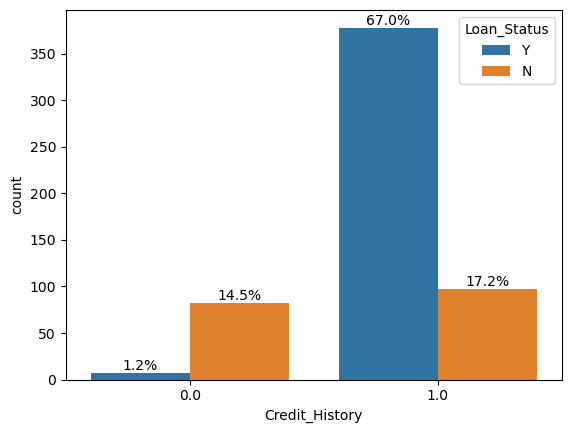

In [16]:
d = sns.countplot(x = "Credit_History",hue = "Loan_Status", data = df)
for c in d.containers:
    labels = [f'{h/df.Credit_History.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    d.bar_label(c, labels=labels, label_type='edge')
plt.show()

As we can see, among applicants with good credit history, 67.0% have loans and 17.2% don't. Among those applicants with bad credit history only 1.2% have loans and 14.5% do not.

In [17]:
df.Property_Area.value_counts(dropna = False)

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

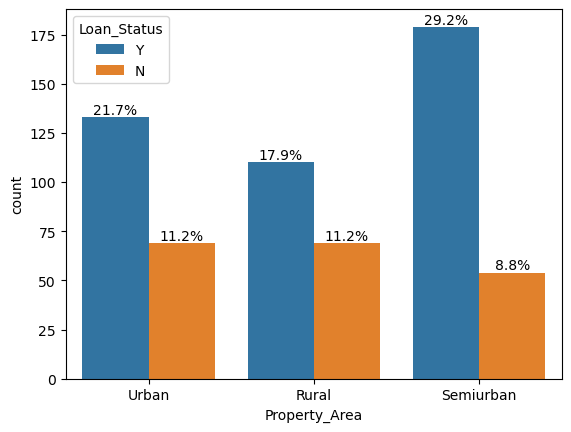

In [18]:
d = sns.countplot(x = "Property_Area",hue = "Loan_Status", data = df)
for c in d.containers:
    labels = [f'{h/df.Property_Area.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    d.bar_label(c, labels=labels, label_type='edge')
plt.show()

Number of applicants living in semiurban area is higher 37.9%(29.2% with loans and 8.8% without loans), followed by applicants living in urban area 32.9%(21.7% with loans and 11.2% without loans) and finaly 29.2%(17.9% have loans and 11.2% do not) are living in rural area.

In [19]:
df.Loan_Status.value_counts(dropna =False)

Loan_Status
Y    422
N    192
Name: count, dtype: int64

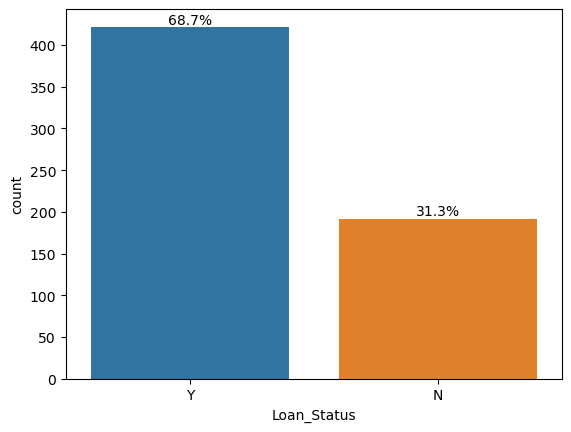

In [20]:
d = sns.countplot(x = "Loan_Status",data = df)
for c in d.containers:
    labels = [f'{h/df.Loan_Status.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    d.bar_label(c, labels=labels, label_type='edge')
plt.show()

The number of applicants with approved loans is higher(68.7%) compared to applicants with no rejected loans(31.3%). 

In [21]:
df.Dependents.value_counts(dropna =False)

Dependents
0      345
1      102
2      101
3+      51
NaN     15
Name: count, dtype: int64

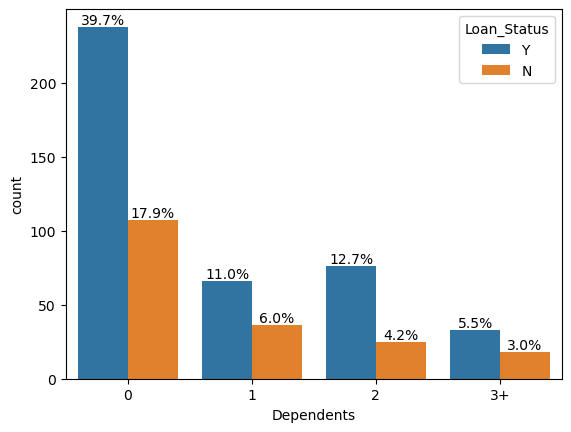

In [22]:
d = sns.countplot(x = "Dependents",hue = "Loan_Status", data = df)
for c in d.containers:
    labels = [f'{h/df.Dependents.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    d.bar_label(c, labels=labels, label_type='edge')
plt.show()

The plot shows that applicants without dependents have the higest number of applicants with loans status, follow by applicants with 2 dependents, applicants with 1 dependent and those with 3+ dependents are the last. For those without loans, we have respectively applicants without dependents, applicants with 2 dependents, applicants with 2 dependents and applicants with 3+ dependents. 

In [23]:
num = df[["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]].describe()
num

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


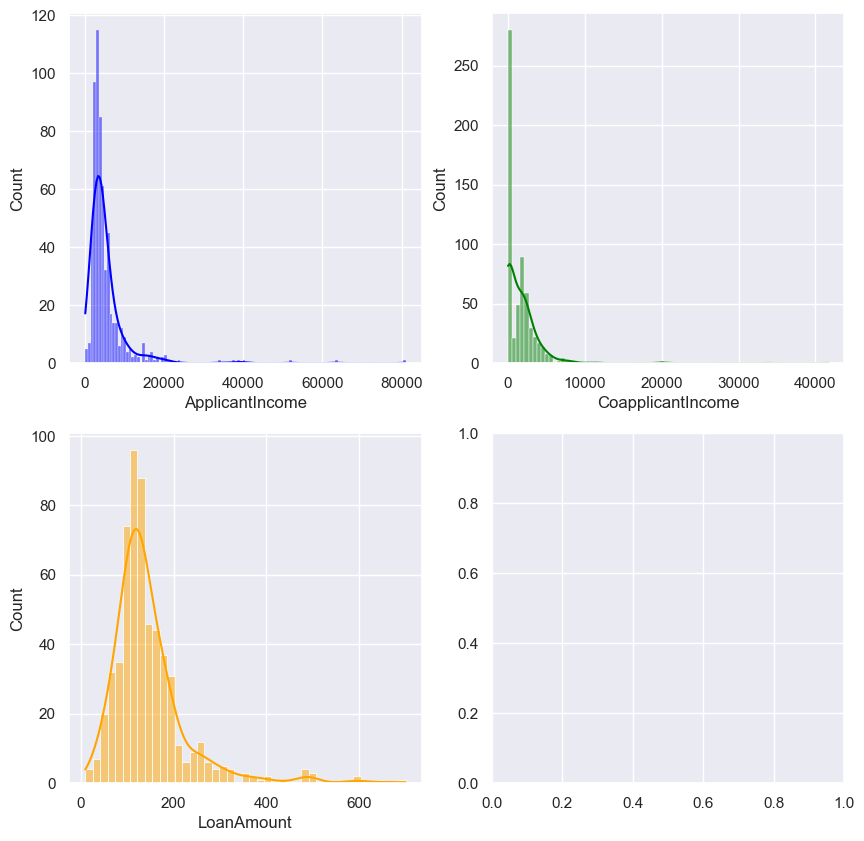

In [24]:
sns.set(style = "darkgrid")
fig, axes = plt.subplots(2,2, figsize =(10,10))

sns.histplot(data = df, x= "ApplicantIncome", kde = True, ax = axes[0,0], color = "blue")
sns.histplot(data = df, x= "CoapplicantIncome", kde = True, ax = axes[0,1], color = "green")
sns.histplot(data = df, x= "LoanAmount", kde = True, ax = axes[1,0], color = "orange")
plt.show()

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

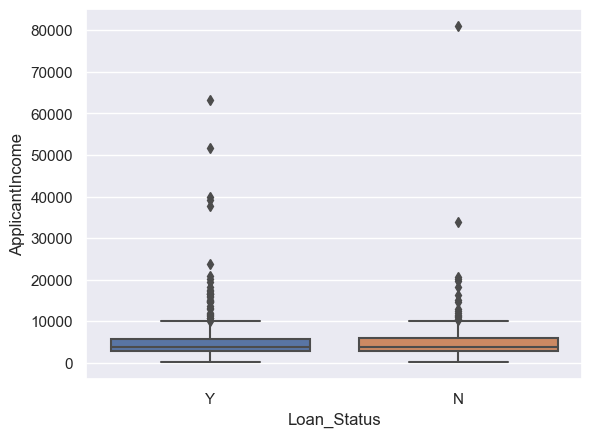

In [25]:
sns.boxplot(data = df, x = "Loan_Status", y = "ApplicantIncome")

<Axes: xlabel='Loan_Status', ylabel='CoapplicantIncome'>

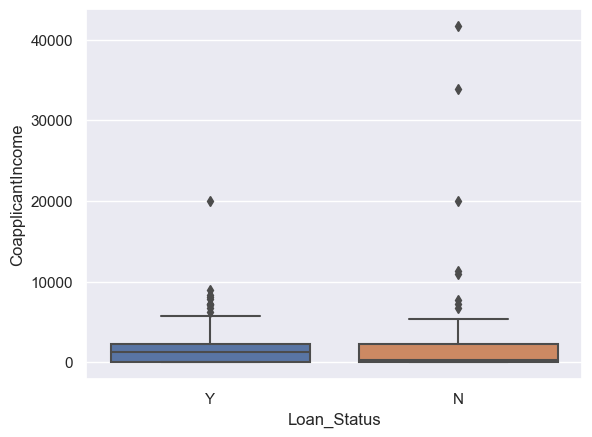

In [26]:
sns.boxplot(data = df, x = "Loan_Status", y = "CoapplicantIncome")

<Axes: xlabel='Loan_Status', ylabel='LoanAmount'>

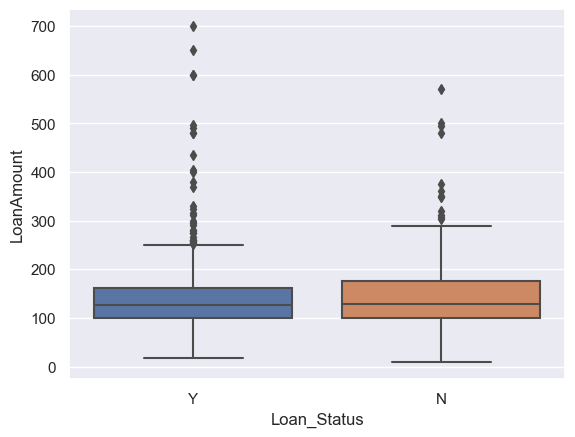

In [27]:
sns.boxplot(data = df, x = "Loan_Status", y = "LoanAmount")

In all the 3 boxplots there are outliers

In [28]:
# Checking for NA or null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

4. Data Preprocessing

In [63]:
# Drop Loan_ID
df = df.drop(["Loan_ID"], axis = 1)

The imputation of null values for categorical varables will be performed using mode and median for numerical varaibles.

In [64]:
df["Gender"].fillna(df["Gender"].mode()[0], inplace = True)
df["Married"].fillna(df["Married"].mode()[0], inplace = True)
df["Dependents"].fillna(df["Dependents"].mode()[0], inplace = True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0], inplace = True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0], inplace = True)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0], inplace = True)
df["LoanAmount"].fillna(df["LoanAmount"].median(), inplace = True)

One-hot Encoding

In [65]:
#Creating dummy variables
df = pd.get_dummies(df)
df = df.drop(["Loan_Status_N"], axis = 1)
nv = {"Loan_Status_Y":"Loan_Status"}
df.rename(columns = nv, inplace = True)
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,5849,0.0,128.0,360.0,1.0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,True,True
1,4583,1508.0,128.0,360.0,1.0,False,True,False,True,False,...,False,False,True,False,True,False,True,False,False,False
2,3000,0.0,66.0,360.0,1.0,False,True,False,True,True,...,False,False,True,False,False,True,False,False,True,True
3,2583,2358.0,120.0,360.0,1.0,False,True,False,True,True,...,False,False,False,True,True,False,False,False,True,True
4,6000,0.0,141.0,360.0,1.0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,True,True


In [66]:
#Remove outliers
def det(df): 
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower = df.min() - 3*df.std()
    upper = df.max() + 3*df.std()
    df = np.where(df > upper,
     upper,
     np.where(df < lower, 
     lower, df))

In [67]:
df.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
Loan_Status                0
dtype: int64

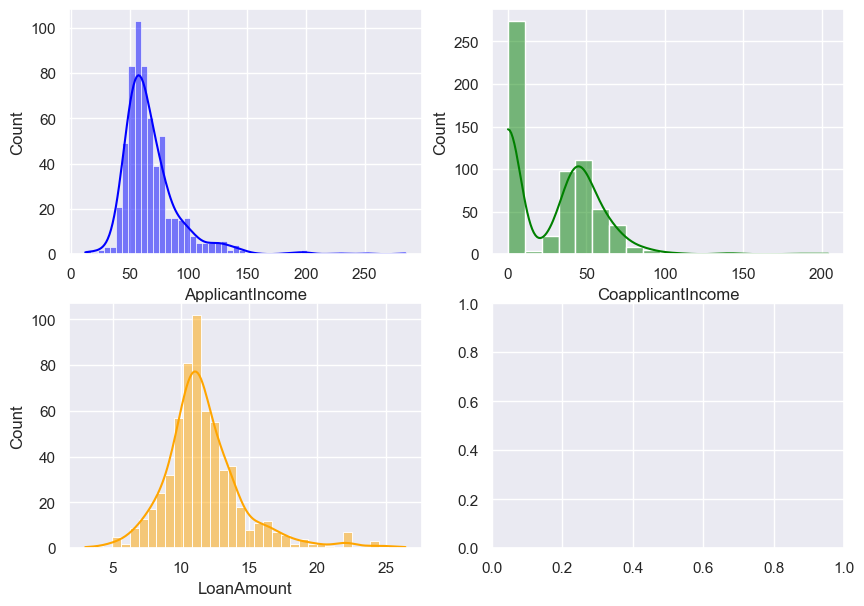

In [9]:
df.ApplicantIncome = np.sqrt(df.ApplicantIncome)
df.CoapplicantIncome = np.sqrt(df.CoapplicantIncome)
df.LoanAmount = np.sqrt(df.LoanAmount)
sns.set(style = "darkgrid")
fig, axes = plt.subplots(2,2, figsize =(10,7))

sns.histplot(data = df, x= "ApplicantIncome", kde = True, ax = axes[0,0], color = "blue")
sns.histplot(data = df, x= "CoapplicantIncome", kde = True, ax = axes[0,1], color = "green")
sns.histplot(data = df, x= "LoanAmount", kde = True, ax = axes[1,0], color = "orange")
plt.show()

Data Normlization

In [68]:
df = pd.DataFrame(df)

In [70]:
df= df.astype(int)

In [71]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,5849,0,128,360,1,0,1,1,0,1,...,0,0,1,0,1,0,0,0,1,1
1,4583,1508,128,360,1,0,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
2,3000,0,66,360,1,0,1,0,1,1,...,0,0,1,0,0,1,0,0,1,1
3,2583,2358,120,360,1,0,1,0,1,1,...,0,0,0,1,1,0,0,0,1,1
4,6000,0,141,360,1,0,1,1,0,1,...,0,0,1,0,1,0,0,0,1,1


Oversampling the dataset using SMOTE

In [85]:
from imblearn.over_sampling import SMOTE
X = df.drop(["Loan_Status"], axis =1) 
y = df["Loan_Status"]

scaler = StandardScaler()
X = scaler.fit_transform(X)
X, y = SMOTE().fit_resample(X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

5. Models

a. Logistic Regression

In [102]:
LRC = LogisticRegression()
fit = LRC.fit(X_train,y_train)
y_pred = LRC.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

from sklearn.metrics import roc_auc_score
AUC_LRC = roc_auc_score(y_test,LRC.predict_proba(X_test)[:,1])
print("AUC_LRC Score: {:.2f}%".format(auc*100))

              precision    recall  f1-score   support

           0       0.86      0.57      0.69        86
           1       0.67      0.90      0.77        83

    accuracy                           0.73       169
   macro avg       0.76      0.74      0.73       169
weighted avg       0.77      0.73      0.73       169

[[49 37]
 [ 8 75]]
AUC_LRC Score: 84.59%


b. Randon Forest

In [87]:
RF = RandomForestClassifier(n_estimators = 10000, random_state = 0)
RF.fit(X_train, y_train)
print(classification_report(y_test, y_pred))
AUC_RF = roc_auc_score(y_test,RF.predict_proba(X_test)[:,1])
print("AUC_RF Score: {:.2f}%".format(AUC_RF*100))


              precision    recall  f1-score   support

           0       0.86      0.57      0.69        86
           1       0.67      0.90      0.77        83

    accuracy                           0.73       169
   macro avg       0.76      0.74      0.73       169
weighted avg       0.77      0.73      0.73       169

AUC_RF Score: 89.09%


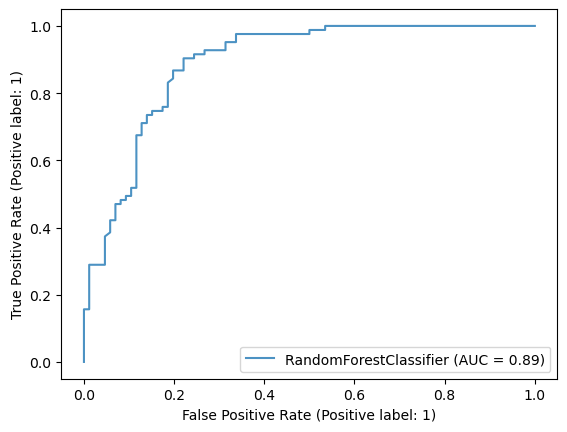

In [88]:
from sklearn.metrics import RocCurveDisplay
ax = plt.gca()
RF_disp = RocCurveDisplay.from_estimator(RF, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

c. XGBoost

In [90]:
#!pip install xgboost
from xgboost import XGBClassifier
model = XGBClassifier(objective='binary:logistic')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
y_pred_proba = model.predict_proba(X_test)
AUC_XGB = roc_auc_score(y_test, y_pred_proba[:,1])
print("AUC_XGB Score: {:.2f}%".format(AUC_XGB*100))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81        86
           1       0.79      0.86      0.82        83

    accuracy                           0.82       169
   macro avg       0.82      0.82      0.82       169
weighted avg       0.82      0.82      0.82       169

AUC_XGB Score: 89.21%


6. Results : Model Comparison

In [104]:
Results = pd.DataFrame({"Models": ["Logistic Regression", "Random Forest", "XGBoost"],
                        "AUC Score" : [AUC_LRC,AUC_RF, AUC_XGB]})
Results.sort_values(by = "AUC Score", ascending = False)

,Models,AUC Score
2,XGBoost,0.892127
1,Random Forest,0.890866
0,Logistic Regression,0.845895


<Axes: xlabel='Models'>

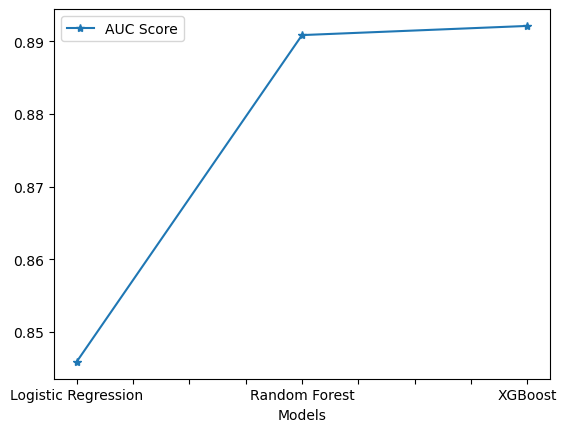

In [106]:
Results.plot(x = "Models", y = "AUC Score", kind = "line", marker = "*")

The plot shows that among all models XGBoost has the highest AUC score of 89.21%.